# Visualizing child welfare in Barcelona

This explainer notebook is made as a part of the final exam project for the 02806 Social data analysis and visualization at DTU during the spring of 2021. The results of the explainer notebook are also displayed on the [webpage](https://barcelona-social-data.netlify.app/).
Several other notebooks and files were used to construct the explainer notebook. 
These can be found on [GitHub]( ), together with the bulk of data. The project aim is to analyse and visualize the results of the 2017 Subjective Child Welfare Survey performed in Barcelona.


 <!-- while the bulk of data is available on [sharepoint](  )
 due to data limitations on github. To access the data a DTU login is needed. -->


The authors:  
*Silvia De Sojo - s192374*  
*Pietro Rampazzo - s203257*  
*Stefan Petrovic - s173991* 

# Table of Contents

1. Motivation  
2. Basic Stats  
        2.1. Data Set    
        2.2. Exploratory Anlaysis     
3. Data Anlaysis   
        3.1. About the Districts     
        3.2. About Feelings    
        3.3. About Life Satisfaction    
4. Genre
5. Visualizations
6. Discussion
7. Collaborations

# 1. Motivation

There are a lot of opinions on what is best for kids? From parents trying to educate them to politicians defining the educational system. But what actions will help shape a happy and healthy society? And how can we improve children's well-being? 

Trying to answer this question, we had a wild idea: Let the kids speak up. Let's try to understand their thoughts. Luckily, we were not the first ones. A survey was made in Barcelona to almost 4000 kids asking questions about their well being [2017 Subjective Child Welfare Survey](https://w10.bcn.es/APPS/riswestudis/documentacio.do?reqCode=mostrarImatge&idDoc=10447). 
The study results were interesting but difficult to interpret and could benefit from additional visualizations and a different presentation mode. So, we decided to work on a visualization that would allow the data to speak for itself. We set the focus on answering: How do kids from different neighbourhoods perceive their welfare?
The idea is to merge the subjective perceptions of the kids (for example, how bored they feel?) with facts about the neighbourhood. Hopefully, we will identify patterns that will help us understand how to help kids feel happier.

**TLDR | Too long to read?** Check-out our 60 seconds [Pitch](https://youtu.be/wwvJ0-q_bBY)

# 2. Basic Stats


In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  
import matplotlib.colors
from googletrans import Translator
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import mode
sns.set(style='white')

A set of basic functions, have been saved in `useful_functions.ipynb` notebook to reduce and simplify the output of the explainer:

In [54]:
# LOAD FUNCTIONS
%run useful_functions-2.ipynb

# 2.1. Data Set

## 2.1.1. Subjective Child Welfare Survey in Barcelona 2017

__SURVEY DETAILS__  

__Original study title:__ Enquesta de Benestar subjectiu de la infància a Barcelona 2017 (EBSIB)  
__Registration number:__ 18017

__Object of the study:__ To know the strengths and areas of improvement of the well-being of the children by means of the method of survey, in addition to distinguishing the socio-cultural and demographic factors, as well as relational and of experience that relate to it.  

__Date of completion of the fieldwork:__ Start date: 01/12/2016 End date: 01/04/2017    
__Validation date:__ 01/04/2017    
__Sample size:__ 3,962 children (52 schools)    
__Sample context:__ A group of children selected through publicly and privately owned schools in the city of Barcelona enrolled in the fifth and sixth years of primary education. Children living in the city of Barcelona who are educated in other municipalities are not included.    
__Methodology:__ Personal interview conducted with computer support (CAPI) at home.  

__Sources:__ 
* [Survey Dataset](https://opendata-ajuntament.barcelona.cat/data/en/dataset/ebsib-bcn-enquesta-benestar-subjectiu-infancia#fieldDescription)  
* [Original Survey Questions](https://w10.bcn.es/APPS/riswestudis/documentacio.do?reqCode=mostrarImatge&idDoc=10447)  
*  Translated Survey Questions (file uploaded in docs/survey-eng.pdf)
* [Survey Portal and additional fields](https://ajuntament.barcelona.cat/ca/informacio-administrativa/registre-enquestes-i-estudis-opinio) *(The survey portal is not supported in Google Chrome)*

In [3]:
file_path = 'data/2017_ebsib_bcn_enquesta_benestar_subjectiu_infancia_barcelona.csv'
df = pd.read_csv(file_path, sep=';')
print(f'Number of kids interviewed: {df.shape[0]}\nNumber of parameters: {df.shape[1]}\nTHE DATASET:')
df.head(3)

Number of kids interviewed: 3962
Number of parameters: 130
THE DATASET:


,ID,Codi_Districte_Educatiu,Nom_Districte_Educatiu,Curs,Sexe,Llar_BCN,ERFDbllp,Edat,amb_qui_vius,familia_altra_casa,...,t_deures,t_tv,t_esport,t_familia,t_airelliure,t_xarxes,t_videojocs,t_resrepos,d_drets,d_convencio
0,1,8,Nou Barris,6è,Nena,Sí,Barris rendes baixes,11,Visc amb la meva família,No,...,Cada dia,5 o 6 dies a la setmana,5 o 6 dies a la setmana,5 o 6 dies a la setmana,3 o 4 dies a la setmana,5 o 6 dies a la setmana,Algun dia al mes,1 o 2 dies a la setmana,Sí,Sí
1,2,8,Nou Barris,6è,Nen,Sí,Barris rendes intermèdies,11,Visc amb la meva família,Sí,...,Cada dia,Cada dia,1 o 2 dies a la setmana,Algun dia al mes,Algun dia al mes,3 o 4 dies a la setmana,1 o 2 dies a la setmana,1 o 2 dies a la setmana,Sí,No n'estic segur/a
2,3,8,Nou Barris,6è,Nena,Sí,Barris rendes baixes,11,Visc amb la meva família,No,...,Cada dia,5 o 6 dies a la setmana,Cada dia,Cada dia,3 o 4 dies a la setmana,3 o 4 dies a la setmana,1 o 2 dies a la setmana,Cada dia,No n'estic segur/a,Sí


__Translations:__  

Since the data set is in Catalan, it was necessary to perform a translation in order to work with meaningful values. In the `src/translation/translation.py` file the translation process was automatized using the [`googletrans`](https://github.com/ssut/py-googletrans) library. The first step was to create a dictionary that stored the translation of all the uniques values in the columns. The dictionary was saved as a JSON file (`t.json`) and a manual check was done to ensure everything looked fine. Finally, a new data set was generated where all values in the rows were replaced with the correspondent translation.

In [4]:
# Translated data-frame:
file_path_t = "/work/data/translated.csv"
df_t = pd.read_csv(file_path_t, sep=",")
df_t = df_t.drop(df_t.columns[0], axis=1)
df_t.head(3)

,ID,Codi_Districte_Educatiu,Nom_Districte_Educatiu,Curs,Sexe,Llar_BCN,ERFDbllp,Edat,amb_qui_vius,familia_altra_casa,...,t_deures,t_tv,t_esport,t_familia,t_airelliure,t_xarxes,t_videojocs,t_resrepos,d_drets,d_convencio
0,1,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,Every day,5 or 6 days a week,5 or 6 days a week,5 or 6 days a week,3 or 4 days a week,5 or 6 days a week,One day a month,1 or 2 days a week,Yes,Yes
1,2,8,Nou Barris,6è,Boy,Yes,Intermediate income neighborhoods,11,I live with my family,Yes,...,Every day,Every day,1 or 2 days a week,One day a month,One day a month,3 or 4 days a week,1 or 2 days a week,1 or 2 days a week,Yes,I'm not sure
2,3,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,Every day,5 or 6 days a week,Every day,Every day,3 or 4 days a week,3 or 4 days a week,1 or 2 days a week,Every day,I'm not sure,Yes


## 2.1.2. Territorial Demographics 2017

When it comes to demographic distributions, the survey data-set does not include detailed parameters. 
Only one variable, `'ERFDbllp'`, contains information about the income level of the neighbourhood the kids live in. This variable will be studied in section __Exploratory Analysis__, and its downsides will be detailed.

Therefore, to include detailed information on the demographics, a new data-set was aggregated: 
- [Income Territorial DataSet](https://opendata-ajuntament.barcelona.cat/data/en/dataset/est-renda-familiar) 

The source includes information on the *Population* of the neighbourhood and *Index RFD*, which is a measure used to evaluate the income level. The *RFD* stands for "Renta Familiar Disponible" translated to "Available Family Income". It is the amount of income available to resident families for consumption and savings, once the amortizations (or consumption of fixed capital) in family economic exploitations and direct taxes and fees have been deducted. [REF](https://es.wikipedia.org/wiki/Renta_familiar_disponible_per_c%C3%A1pita)

The data-set is at neighbourhood level, while the original survey only included information at District Level. Barcelona is a municipality divided into 10 districts, and those districts are sub-divided into neighbourhoods. The picture below illustrates the 73 neighbourhood:

<!-- ![Barcelona Districts and neighborhood](https://ca.wikipedia.org/wiki/Districtes_i_barris_de_Barcelona#/media/Fitxer:Barcelona_Barris_map.svg) -->
![Barcelona Districts and neighbourhood](/viz/BCN.png)


Therefore it was necessary to aggregate the data from the **Income Territorial DataSet** into Districts. The Population of each neighbourhood was summed to display the District Level and it was used to perform a weighted Mean of the RFD Index.

In [5]:
# Include Average income and Population by neighborhood
# Import Territorial Demographics:
file_path = 'data/2017_distribucio_territorial_renda_familiar.csv'
df_inc = pd.read_csv(file_path, sep=',')

# Calculate sum of Population / Mean RFD Index/ Weighted Mean RFD Index (taking in to account population) --> By neighborhood
df_inc['SumW']= df_inc['Població'] * df_inc['Índex RFD Barcelona = 100']
df_dist = df_inc.groupby(['Codi_Districte']).agg({'Població':'sum','SumW':'sum', 'Índex RFD Barcelona = 100':'mean'})
df_dist['RFD-sumw']= df_dist['SumW'] / df_dist['Població']
df_dist.pop('SumW')

# Aggregate measures in the original data-set
df_t = df_t.join(df_dist, on='Codi_Districte_Educatiu').rename(columns={'Índex RFD Barcelona = 100':'RFD-mean'})

# Calculate Std. deviation and Std. error of RFD Index and aggregate to original
df_dist2 = df_inc.groupby(['Codi_Districte']).agg({'Índex RFD Barcelona = 100':'std'})
df_t = df_t.join(df_dist2, on='Codi_Districte_Educatiu').rename(columns={'Índex RFD Barcelona = 100':'RFD-std'})
df_dist3 = df_inc.groupby(['Codi_Districte']).agg({'Índex RFD Barcelona = 100':'sem'})
df_t = df_t.join(df_dist3, on='Codi_Districte_Educatiu').rename(columns={'Índex RFD Barcelona = 100':'RFD-sem'})

In [6]:
# Example of Added variables:
df_t.loc[:,['Nom_Districte_Educatiu', 'Població', 'RFD-sumw', 'RFD-mean', 'RFD-std', 'RFD-sem']].head(1)

,Nom_Districte_Educatiu,Població,RFD-sumw,RFD-mean,RFD-std,RFD-sem
0,Nou Barris,166805,55.011607,51.446154,7.426261,2.059674


# 2.2. Exploratory Analysis

The first step was to assess the descriptive elements of the children surveyed. Their gender and age distribution is evaluated, together with the school grade they currently are, and their origin. To visualize the distribution, a stacked bar plot is used for each attribute with its different categories as levels. Categorical colours are used, to allow the reader to get a quick overview of the proportions.

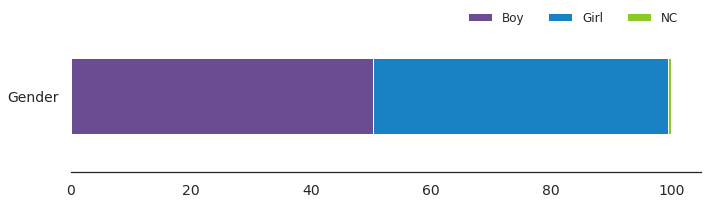

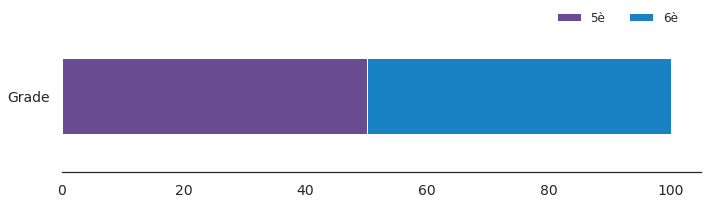

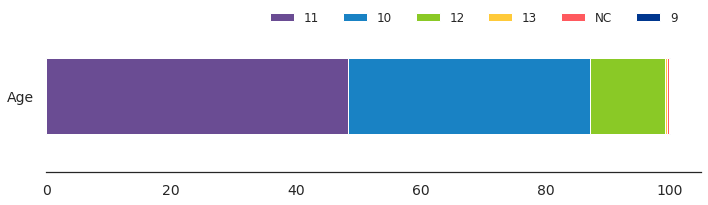

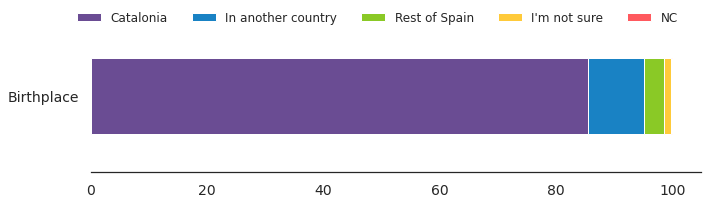

In [7]:
exp_vars = ['Sexe', 'Curs', 'Edat', 'on_vas_niexer']
name_vars = ['Gender', 'Grade', 'Age', 'Birthplace']

# Plotting for each atribute, with function defined in 'useful functions.ipynb'
for elem,lab in zip(exp_vars, name_vars):
    stacked_vars(df_t, elem, colors, lab, leg='top')

When it comes to Gender and Grade, the survey is evenly distributed. 
Most of the kids are 10 - 11 years old, but almost 10% of them are already 12.
Furthermore, up to 85% of kids surveyed are from Catalonia, while around 10% are from another country.  

Now let's look at the districts of the kids surveyed and let's evaluate its distribution against the actual population from Barcelona:

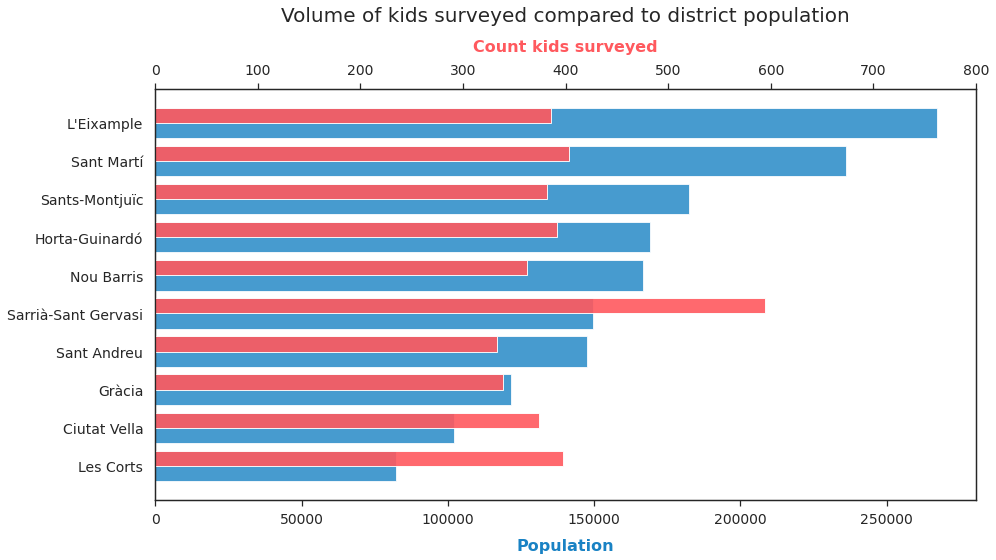

In [8]:
# Getting POPULATION data by DISTRICT
dist_name ='Nom_Districte_Educatiu'
df_POB = df_t.loc[:,[dist_name, 'Població']].drop_duplicates(keep='first',inplace=False).sort_values(by=['Població'])

# Number of kids surveyed by DISTRICT (sorted with POPULATION)
district_names = df_POB[dist_name].unique()
district_count = [(df_t[dist_name] == x).sum() for x in district_names]

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.barh(df_POB.Nom_Districte_Educatiu, df_POB.Població, color=colors[1], alpha=0.8, height=0.8)
ax1.tick_params(labelsize=14, pad=6)

# Creating a secondary axis and plotting population
ax2 = ax1.twiny()
ax2.barh(district_names, district_count, color=colors[4], alpha=0.9, height=0.4, align='edge')
ax2.set_xlim([0, 800])
ax2.tick_params(labelsize=14, pad=6)

ax2.set_xlabel('Count kids surveyed', color=colors[4], size=16, labelpad = 12, fontweight ="bold")
ax1.set_xlabel('Population', color=colors[1], size=16, labelpad = 12,fontweight ="bold")
plt.title('Volume of kids surveyed compared to district population', fontsize=20, y=1.15)

# plt.rcParams['figure.dpi'] = 400
# plt.savefig('exp_population-dist.png', bbox_inches='tight')

plt.tight_layout()
plt.show()

It is possible to detect that the proportions of kids surveyed do not follow Barcelona's Population distribution. The most populated neighbourhoods keep a similar amount of answers to the less populated ones.  This represents that the survey results will not precisely represent Barcelona distribution. However,  the amount of data points by district allows us to make conclusions on them separately.

Nevertheless, _Sarrà-Sant Gervasi_ has a representation of 600 kids while the rest of the neighbourhoods range between 350-400 kids.  This is an important difference since _Sarrà-Sant Gervasi_  is a known expensive neighbourhood, which will be overrepresented on the aggregated results.  

When evaluating the different levels of income of the districts an incongruence was detected in the survey on variable `'ERFDbllp'`, which represents the different income levels (Low, Intermediate and High). It was possible to see that different income levels were associated to the same district, thus it was not possible to identify a unique income level by district.  

To analyse this situation, it was necessary to include the information from the actual RFD index of the district in the same year. This information was gathered from the beforementioned Territorial dataset from [BCN OpenData](https://upload.wikimedia.org/wikipedia/commons/a/ab/Barcelona_Barris_map.svg).

Two examples are used to display the incongruences:

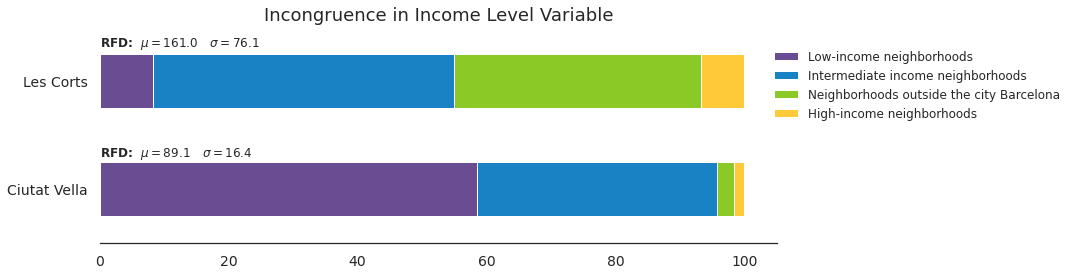

In [9]:
# Evaluating Ciutat Vella and Les Corts Income levels:
name_var='ERFDbllp'
ix_mean = 'RFD-mean'
ix_std = 'RFD-std'
noms = ['Ciutat Vella', 'Les Corts']


count1 = df_t.loc[df_t.Nom_Districte_Educatiu == noms[0]][name_var].value_counts(normalize=True)*100
piv_1 = count1.to_frame().T.rename(index={name_var: noms[0]})

count2 = df_t.loc[df_t.Nom_Districte_Educatiu == noms[1]][name_var].value_counts(normalize=True)*100
piv_2 = count2.to_frame().T.rename(index={name_var: noms[1]})

piv_ = piv_1.append(piv_2)
levels = piv_.shape[1]

piv_.plot.barh(stacked=True, figsize=(15,4), color = colors[:levels])
plt.tick_params(labelsize=14, pad=6)

plt.legend(bbox_to_anchor=(0.98,0.94), loc="upper left", frameon=False, fontsize='medium')
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.title('Incongruence in Income Level Variable', fontsize=18, y=1)


# Adding text box
ix_1_m = df_t.loc[df_t.Nom_Districte_Educatiu == noms[0]][ix_mean].unique()[0]
ix_1_s = df_t.loc[df_t.Nom_Districte_Educatiu == noms[0]][ix_std].unique()[0]
ix_2_m = df_t.loc[df_t.Nom_Districte_Educatiu == noms[1]][ix_mean].unique()[0]
ix_2_s = df_t.loc[df_t.Nom_Districte_Educatiu == noms[1]][ix_std].unique()[0]

textstr1 = 'RFD:  '+ '   '.join((r'$\mu= %.1f$' % (ix_1_m,), r'$\sigma= %.1f$' % (ix_1_s,)))
ax.text(0, 0.45, textstr1, transform=ax.transAxes, fontsize=12, fontweight ="bold",
        verticalalignment='top')

textstr2 = 'RFD:  '+ '   '.join((r'$\mu= %.1f$' % (ix_2_m,), r'$\sigma= %.1f$' % (ix_2_s,)))
ax.text(0, 0.96, textstr2, transform=ax.transAxes, fontsize=12, fontweight ="bold",
        verticalalignment='top')
        
plt.tight_layout()

In [10]:
piv_

,Low-income neighborhoods,Intermediate income neighborhoods,Neighborhoods outside the city Barcelona,High-income neighborhoods
Ciutat Vella,58.556150,37.165775,2.673797,1.604278
Les Corts,8.312343,46.599496,38.287154,6.801008


The stacked bars highlight how different income levels are appointed to each district. At an early stage, the expectation was that each district would have one defined income level. However, it was possible to observe that the differences came from the aggregation of neighbourhoods to districts. In the Survey data,  we don't have the _neighbourhoods_ where the kids are from, only their _district_. But in variable `'ERFDbllp'` the information is provided at neighbourhood level.

Observing the two examples provided, it is possible to appreciate the diversity within districts and recognize that there is not always a predominant level above the others. 

> In _Ciutat Vella_  60% of the kids surveyed are from a low-income neighbourhood and up to 35% from an intermediate-income level.  

> A different situation is encountered in _Les Corts_, where almost 40% of the kids are from a neighbourhood marked outside of Barcelona. This highlights a potential error in the data set. As it was detailed in section _1.2. Territorial Demographics_, all the neighbourhoods part of _Les Corts_ are indeed part of Barcelona municipality.  However, _Les Corts_ falls on the border of Barcelona municipality, limiting at its west, north-west and south with three different municipalities. Therefore,  it could be that one neighbourhood was incorrectly labelled as outside of Barcelona or that one neighbourhood from another municipality was included in the study.  Regardless of this situation, the data from  _Les Corts_  will still be used since the objective is not to accurately represent the children, only, from Barcelona municipality, but to get an overview of the children wellfare of the area.

Taking advantage of the external data-set it is possible to compare the levels with the mean and standard deviation of the aggregated RFD index.

In [11]:
df_t.loc[:,['Nom_Districte_Educatiu','RFD-sumw', 'RFD-std','RFD-sem']].drop_duplicates(keep='first',inplace=False)

,Nom_Districte_Educatiu,RFD-sumw,RFD-std,RFD-sem
0,Nou Barris,55.011607,7.426261,2.059674
41,Ciutat Vella,84.305653,16.388487,8.194243
74,Sant Martí,88.139150,35.919633,11.358785
222,Horta-Guinardó,77.972005,11.814406,3.562177
391,Sarrià-Sant Gervasi,182.792187,28.884713,11.792135
603,Sants-Montjuïc,84.592545,18.687352,6.606977
923,Sant Andreu,74.620786,11.682853,4.415703
1138,Les Corts,137.294018,76.092312,43.931917
1435,Gràcia,105.342970,9.988243,4.466878
2212,L'Eixample,122.445749,29.114303,11.885865


Displaying the RFD index by district, calculated with the weighted mean (using neighbourhood population) we can get a general understanding of the income level of the districts. The plot displays on one axis the Population as bars and the RFD index weighted mean, together with its standard error in the other axis. 

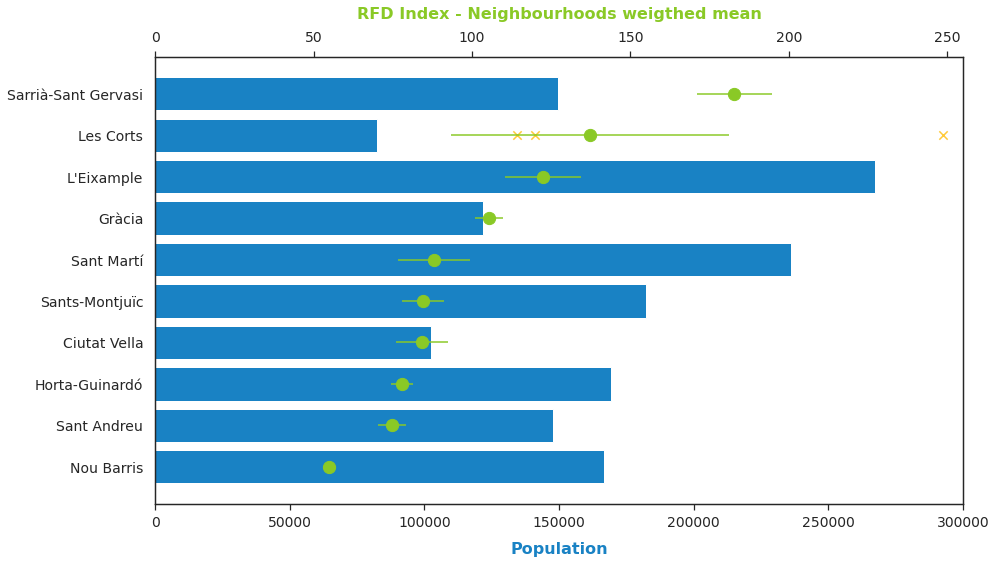

In [12]:
# RFD index by DISTRICT:
ix_sem = 'RFD-sem'
ix_sw = 'RFD-sumw'
df_RFD = df_t.loc[:,[dist_name, ix_sw, ix_std, ix_sem,'Població']].drop_duplicates(keep='first',inplace=False).sort_values(by=[ix_sw])

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.barh(df_RFD[dist_name], df_RFD['Població'], color=colors[1])
ax1.tick_params(labelsize=14, pad=6)
ax1.set_xlim([0,300000])

# Creating a secondary axis and plotting population
ax2 = ax1.twiny()
ax2.scatter(y=df_RFD[dist_name], x= df_RFD[ix_sw], color=colors[2], s=150, marker="o")
ax2.errorbar(y=df_RFD[dist_name], x= df_RFD[ix_sw], xerr=df_RFD[ix_sem], linestyle="None", color=colors[2])
ax2.set_xlim([0,255])
ax2.tick_params(labelsize=14, pad=6)

corts = df_inc.loc[df_inc.Nom_Districte == 'Les Corts'].loc[:,['Nom_Districte', 'Índex RFD Barcelona = 100']]
ax2.scatter(y=corts['Nom_Districte'], x= corts['Índex RFD Barcelona = 100'], color=colors[3], s=70, marker="x")

ax1.set_xlabel('Population', size=16, labelpad = 12, color=colors[1], fontweight ="bold")
ax2.set_xlabel('RFD Index - Neighbourhoods weigthed mean', size=16, labelpad = 12, color=colors[2], fontweight ="bold")
# plt.title('RFD Index by District', fontsize=20, y=1.15)

plt.tight_layout()
plt.show()

It is possible to observe that there are some districts wealthier than others.  With _Sarrià-Sant Gervasi_, _Les Corts_ and _L'Eixample_ being the wealthiest and _Nou Barris_, _Sant Andreu_ and _Horta-Guinardó_ the least wealthy. 

However, it is important to discuss on the high standard error of _Les Corts_. The district only includes 3 neighbourhoods (a low number compared to the other districts, as dispalyed in section: _Territorial Distribution_ ), and the neighbourhoods are very diverse. In fact, the RFD index of each neighbourhood was included in the plot (with yellow crosses) to highlight their differences. The neighbourhood with the highest index corresponds to _Pedralbes_, which is the known most expensive area in Barcelona city, being the dwelling of the  Consulate of the United States of America and residence of billionaires. This neighbourhood is far from any other, including _La Maternitat and Les Corts (barri)_ the two other neighbourhood from the district.

In [13]:
zcorts = df_inc.loc[df_inc.Nom_Districte == 'Les Corts'].loc[:,['Nom_Districte', 'Nom_Barri','Població', 'Índex RFD Barcelona = 100']]
corts

,Nom_Districte,Índex RFD Barcelona = 100
18,Les Corts,120.0
19,Les Corts,114.2
20,Les Corts,248.8


# 3. Data Analysis
# 3.1. About the Districts 

Before going through the kids' perception of welfare it is interesting to evaluate the characteristics of the districts they live in.

First, the kids' perception on two valuable elements of their district are evaluated: Its **security** and its **areas dedicated for children**. In the survey, kids were asked how much they agreed on sentences: "I feel secure when walking through my neighbourhood" and "In the neighbourhood I live, there are enough areas where I can play". Their agreement was classified in different levels, however, to understand the behaviour by district we will focus on the proportion of kids that agreed with the statements.

![](https://raw.githubusercontent.com/peterampazzo/dtu-02806-website/master/demo/gif1.gif)

[Live version](http://barcelona-social-data.netlify.app/#maps)

In the plot presented, a lower ratio will indicate that there is a lower number of kids feeling secure or feeling that they have enough areas to play. The two plots are displayed together to compare if there is a shared pattern between the two elements.

It is possible to observe that the distribution is more diverse when it comes to security, compared to the playgrounds.  _Sants-Montjuïc_, _Ciutat Vella_ and _Nou Barris_ are the districts with the lowest agreement on security. As previously commented, _Nou Barris_ is the district with the lowest RFD index, however the other two fall in the intermediate-low range. _Sants-Montjuïc_ and _Ciutat Vella_ appear as well as the districts where kids don't agree on having enough areas to play, together with _Horta-Guinardó_. This highlights a potential relationship between the two elements, however correlation doesn't imply causality, and there could be an unexplored confounder such as, for example, the monetary investments the district received.

Secondly, it is interesting to assess the **material scarcities** that the children might be experiencing. To evaluate them, a set of Yes-No questions were evaluated and the proportion of No's are displayed:


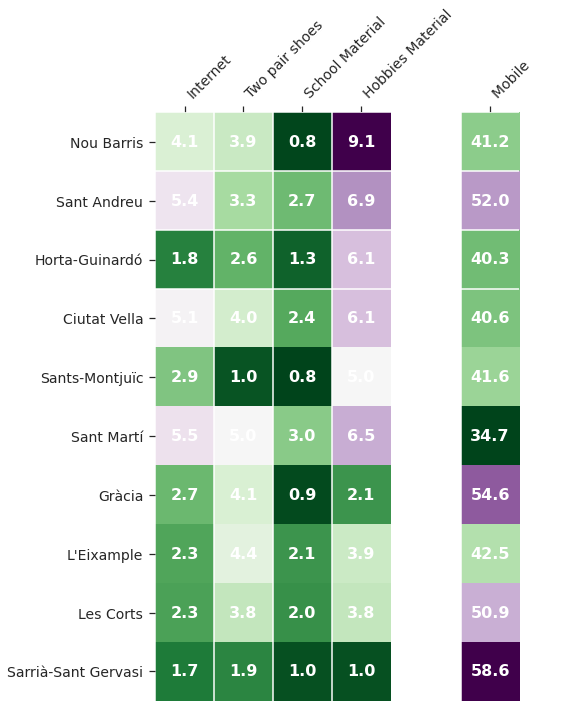

In [55]:
df_ = df_t.copy()
att_name = 'Nom_Districte_Educatiu'
levels = ['bm_internet', 'bm_sabates', 'bm_mescola', 'bm_maficions']
lev_new= ['Internet', 'Two pair shoes', 'School Material', 'Hobbies Material']

# Function imported from useful functions: 
m, att = am_dataprep(df_, att_name, levels)

levels2 = ['bm_mobil']
sec_lev= ['Mobile          ']

sec_mtrx, att = am_dataprep(df_, att_name, levels2)
bat_plot2(m,lev_new, att, sec_mtrx, sec_lev, fig_tup=(8,10), cmap='PRGn_r')

The districts are ordered by descending RFD index, from _Nou Barris_ to _Sarrià-Sant Gervasi_. This ordering allows seeing how the greener colours fall in the bottom left of the table, showing that the wealthier have indeed more access to basic materials. It is interesting to evaluate the differences between categories. The proportion of kids that don't have enough **school materials** is lower than in other categories, indicating that most kids have access to them. However, the disparity is stronger when it comes to the **materials to do their hobbies** and having a **study place** to study at home. With the most disadvantaged neighbourhoods having the highest ratio of deficiencies. It is interesting as well to see the heavy differences between having or not a mobile phone. The higher ratio of kids that don't have a mobile phone is in the wealthier districts. Inverting the pattern previously observed on the other materials. Therefore, the proportion of kids in wealthier districts that have mobile phone is lower.

Another important aspect is to evaluate if there are differences in the family structure. To analyse it, the results of the question "Who lives with you in the house where you live all the time or the majority of the time?" 


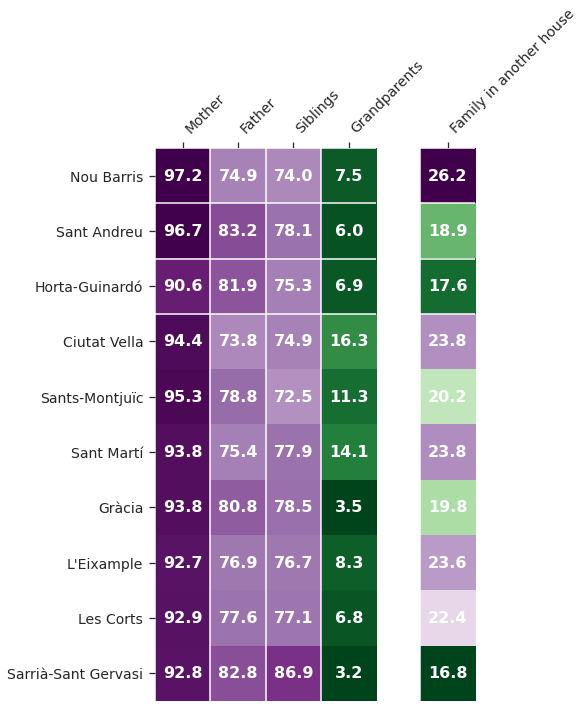

In [56]:
att_name = 'Nom_Districte_Educatiu'
levels = ['mare', 'pare', 'germans', 'avis']
lev_new= ['Mother', 'Father', 'Siblings', 'Grandparents']

m, att = am_dataprep(df_, att_name, levels, no=False)

levels2 = ['familia_altra_casa']
sec_lev= ['Family in another house']

sec_mtrx, att = am_dataprep(df_, att_name, levels2, no=False)
bat_plot2(m,lev_new, att, sec_mtrx, sec_lev, fig_tup=(8,10), cmap='PRGn_r')

The results show that in all districts there is a higher proportion of kids living with their **mothers** than with their **fathers**, the range is surprisingly different. Furthermore, it is possible to see that the proportion of kids living with their mothers is higher for the most disadvantaged districts. Looking at the ratios of **Family on another house**, it is possible to observe that the ratio doesn't strictly follow the wealthiness order, but still, the highest proportion is identified on _Nou Barris_ while the lowest in _Sarrià-Sant Gervasi_. 


# 3.2. About Feelings

To explore the frequency of different emotions the survey includes one question which contains a list of feelings, and the kids are asked to identify how often they have felt these emotions in the last two weeks. The kids are provided with a table with levels from 0 to 10 and are asked to mark one value. It is explained that 0 represents that you have _Not felt_ this emotion in the last two weeks and 10 you have felt it _All the time_.  An extract from question 45 of the original survey is presented. ![Extract from question 45 of the original survey](../viz/q45.png)

The first step will be to represent the results of the question. To do so, we will first look into the ratio of answers between the different levels (0 to 10) by feelings. Using a color gradient we aim to identify if there is a pattern between how kids decide between the wide range of levels. 

In [18]:
# Feelings analysis 
cols = ['Codi_Districte_Educatiu','Nom_Districte_Educatiu', 'f_felicitat', 'f_energia','f_calma', 'f_avorriment','f_estres','f_tristesa']
f_freq = df[cols].copy()
f_freq = f_freq.dropna()

feelings = cols[::-1][:-2]
levels = ['NC']+[str(n) for n in range(0,11)]

In [19]:
# Preparing a fucntion for the Feelings Data Prep
def f_dataprep(f_freq, ret_dic=True, codi=0, codi_var=''):
    # Creating a dictionary with the levels to generate stacked bar
    dic = {level:[] for level in levels}

    # Creating a dataframe with the levels for bokeh
    df_ = pd.DataFrame(index=levels, columns=feelings)
    df_ = df_.fillna(np.nan)

   
    for feeling in feelings:
        if codi == 0: 
            ratio = f_freq[feeling].value_counts(normalize=True)*100
            for level in levels: 
                dic[level].append(ratio[level])
                df_[feeling] = ratio

        else:
            ratio = f_freq[f_freq[codi_var] == codi][feeling].value_counts(normalize=True)*100
            for level in ratio.index: 
                dic[level].append(ratio[level])
                df_[feeling] = ratio

    if ret_dic:
        return(dic)
    else:
        return(df_)

In [20]:
# Preparing the Feelings Labels for Plotting
feelings_names = ["SAD", "STRESSED", "BORED","CALM", "ENERGETIC", "HAPPY"]
f_labels={}
for cat_e,eng_e in zip(feelings,feelings_names):
    f_labels[cat_e]=eng_e

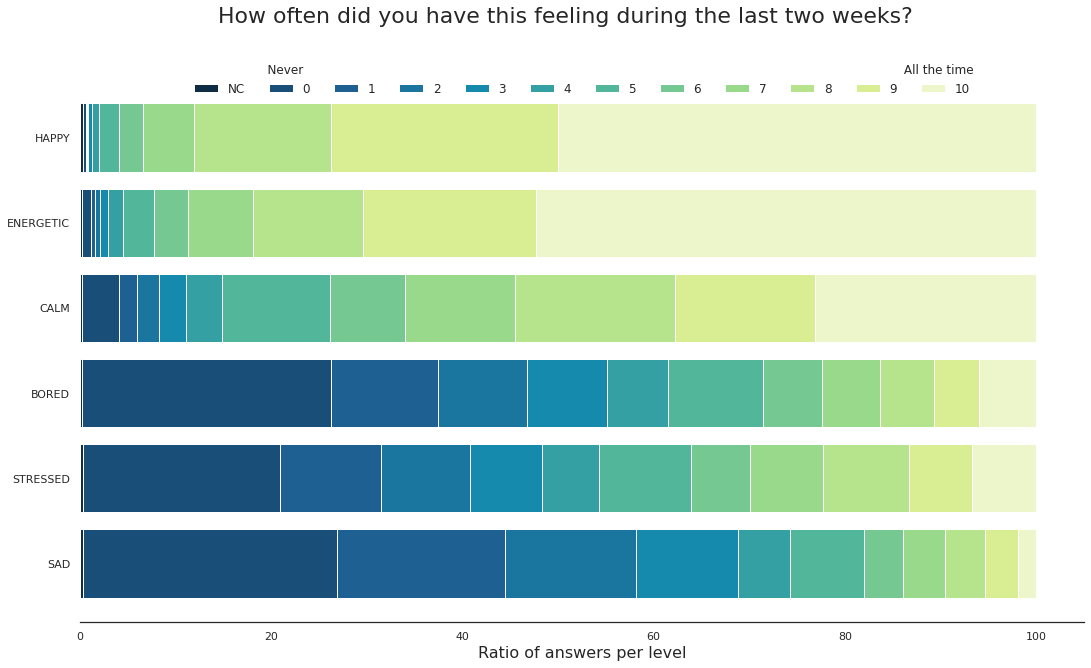

In [21]:
f_dict = f_dataprep(f_freq, ret_dic=True)
# Function for the visualization imported from:  useful-functions.ipynb 
f_sbar_plot(f_dict) 

By inspecting the colour grading, it is possible to appreciate the importance of extreme answers. 

The higher proportion of answers falls in the extreme values _All the time_  (10) for the positive feelings and _Never_ (0) on the most negative feelings (reaching values around 20%).

This tendency to select the extreme answers can be related to the fact that we are analyzing kids between ages 10 to 12. Ages where the characterized sensibility of adults, is not yet completely developed [REF](Dunn, J., Brown, J. R., & Maguire, M. (1995). The development of children's moral sensibility: Individual differences and emotion understanding. Developmental Psychology, 31(4), 649–659.) [LINK](https://psycnet.apa.org/record/1995-40081-001). When looking at surveys from teenagers and adults it is possible to see a change in this tendency. This is further studied by the catalan center "Centre d'estudis d'Opinió" and the data is accesible in  [Valors socials i polítics a Catalunya. 2015 REO 798. Generalitat de
Catalunya.](https://ceo.gencat.cat/ca/estudis/registre-estudis-dopinio/estudis-dopinio-ceo/societat/detall/index.html?id=5509). The "Centre d'estudis d'Opinió" presents this phenomenon as the Vital Optimism-Bias of children (Casas, 2011; Casas i Bello, 2012). This phenomenon describes how kids tend to answer more positively than adults when asked about their welfare.

Moreover, it is possible to observe that the tendency to mark _All the time_ in the positive feelings is higher than to mark _Never_ on the negative feelings, reflecting that this optimism is more noticeable in the positive feelings.

However, it is important to not look only at the extreme answers but understand the details of each feeling distribution. 

The next graph displays all the feelings together, aggregated by positive or negative feelings:

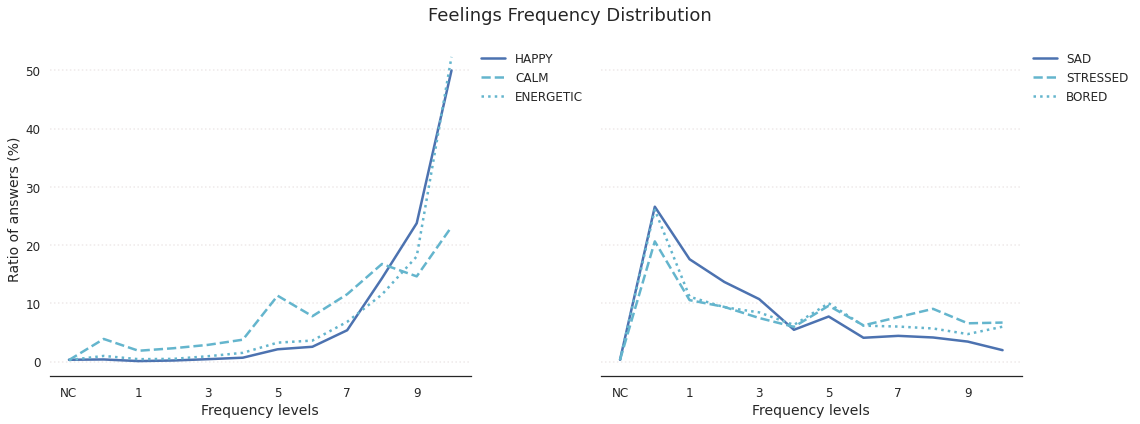

In [22]:
f_df = f_dataprep(f_freq, ret_dic=False, codi=0)
# Function for the visualization imported from:  useful-functions.ipynb 
f_dist_plot(f_df)

The graph shows the different clear behaviours between positive and negative feelings. The peak is more pronounced in "Happiness" and "Energy", while the tails are wider on the negative feelings. 

However, it is interesting to display the paired feelings together:

In [23]:
def f_dist_plot1(df_):
    df_ = df_.rename(columns=f_labels)
    pairs = [['HAPPY','SAD'],['CALM','STRESSED'], ['ENERGETIC','BORED']]

    fig,axs = plt.subplots(ncols=3, nrows=1, figsize=(20,5), sharey=True, sharex=True)
    for ax,pair in zip(axs,pairs):
        df_.loc[:,pair[0]].plot(ax=ax, kind='bar', fontsize=12, color=colors[3], width=1)
        df_.loc[:,pair[1]].plot(ax=ax, kind='bar', fontsize=12, color=colors[0], alpha = 0.8, width=1)

        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)

        ax.grid(axis='y', color='#eee9e9', linestyle='dotted', linewidth=1.5)
        ax.legend(bbox_to_anchor=(0.5,0.95), loc="lower center", ncol=2, frameon=False, fontsize='medium')
        
        ax.set_xlabel("Frequency levels", fontsize=14)
        ax.set_ylabel("Ratio of answers (%)", fontsize=14)
        ax.tick_params(axis='x', labelrotation = 0)

    plt.suptitle("Feelings Frequency Distribution", fontsize=18)

    # plt.savefig('f_dist.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

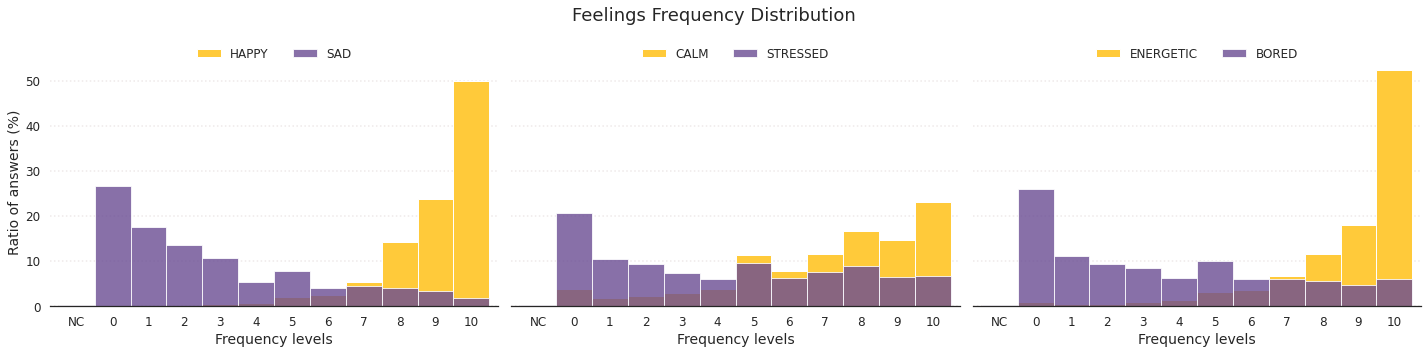

In [24]:
# STATIC VERSION
f_df_ = f_dataprep(f_freq, ret_dic=False, codi=0)
f_dist_plot1(f_df_)

The next plot displays the ratio of the different frequency levels per pair of opposite feelings. To get a view of the complete distribution of one feeling, for instance to observe the tail of _Happiness_, it is possible to select the different feelings on the legend (by clicking on them).  Furthermore, it is possible to explore the differences between districts by filtering in the top panel, which provides details on demand.

In [36]:
# DYNAMIC WITH BOKEH - Imported from notebook: 
%run ./viz/viz-f_dynamic.ipynb

Loading BokehJS ...

A previously discussed, it is possible to observe that the peak is more pronounced in the positive feelings than in the negative ones. With around 50% of the children marking that they felt _Happy_ and _Energetic_, _"All the time"_. Only 2% of kids marked a level of 4 or less in Happiness, nonetheless, even if the ratio is low it should not be overlooked since this represents that approximately 80 of the kids surveyed are rarely feeling happy.

The peak for the rest of the feelings falls within the 20%-30% range, with _Calm_ reassembling more the behaviour of the negative feelings (with a mirrored distribution). It is also possible to see a peak on the answers at level 5, which falls in the middle of the distribution. This behaviour is not strange, since it could reflect the more hesitant kids.

When evaluating the negative feelings it is possible to see that the tail of the distribution is wider. This represents that even if kids will generally say that they experience _Happiness_ _"All the time"_, 14% of them will experience _Sadness_ _"Usually"_, marking it with a level of 7 or above. The same is observed with _Stress_ and _Boredom_, which reaches a proportion of 30% and 22% respectively, in the same frequency level. 

It is possible to osberve that the general pattern is mainatined between the different districts, however slight differencess appear on "Boredom". To assess the differences between the districts it is necessary to visualize them all together. Therefore the next step will be to study how the feelings are distributed against different districts: 

<!-- This highlights that is especially important to look at the demographics that represent each frequency level, especially on the negative feelings.  -->

![](https://raw.githubusercontent.com/peterampazzo/dtu-02806-website/master/demo/gif2.gif)

[Live version](http://barcelona-social-data.netlify.app/#radar)

While the behaviour for the positive feelings is maintained for the different districts. There are some clear deviations on the negative feelings. 

If we take the district with the highest RFD Index, _Sarrià-Sant Gervasi_ and compare it with the lowest one, _Nou Barris_. It is possible to detect an increase for _Nou Barris_ in the level of Boredom and Sadness of 8 and 4 points respectively. Indicating a difference in behaviour. However, this pattern is not always maintained. 

When comparing the districts in the lower range of  RFD Index (_Nou Barris_, _Horta-Guinardó_ and _Sant Andreu_) it is possible to observe that the behaviour of  _Horta-Guinardó_ is similar to _Nou Barris_  but the level of stress is 5 points higher. Instead the behaviour of  _Sant Andreu_ reassembles more the behaviour detected for _Sarrià-Sant Gervasi_.

Therefore, even if we can detect differences between the different neighbourhoods, it is important to look into other variables that might be affecting the emotions of the children. 

# 3.3. About Life Satisfaction
## 3.3.1. Visualizing against attribute variables

Instead of looking at the feelings, it is as well possible to evaluate the children's perception towards _life satisfaction_. The survey includes the question: "To what extent are you satisfied with your life? Where kids can answer by marking a level between 0 to 10, with 0 being "Not at all" and 10 "Completely Satisfied". 

To evaluate the children answers the factors have been aggregated in 4 levels: "Very", "Fairly", "Slightly" and "Not at all". When an answer is not provided it is considered as "NC".

To evaluate how different plots impact the  _life satisfaction_, it is possible to plot it against different variables. Let's start by looking at the different neighbourhoods.


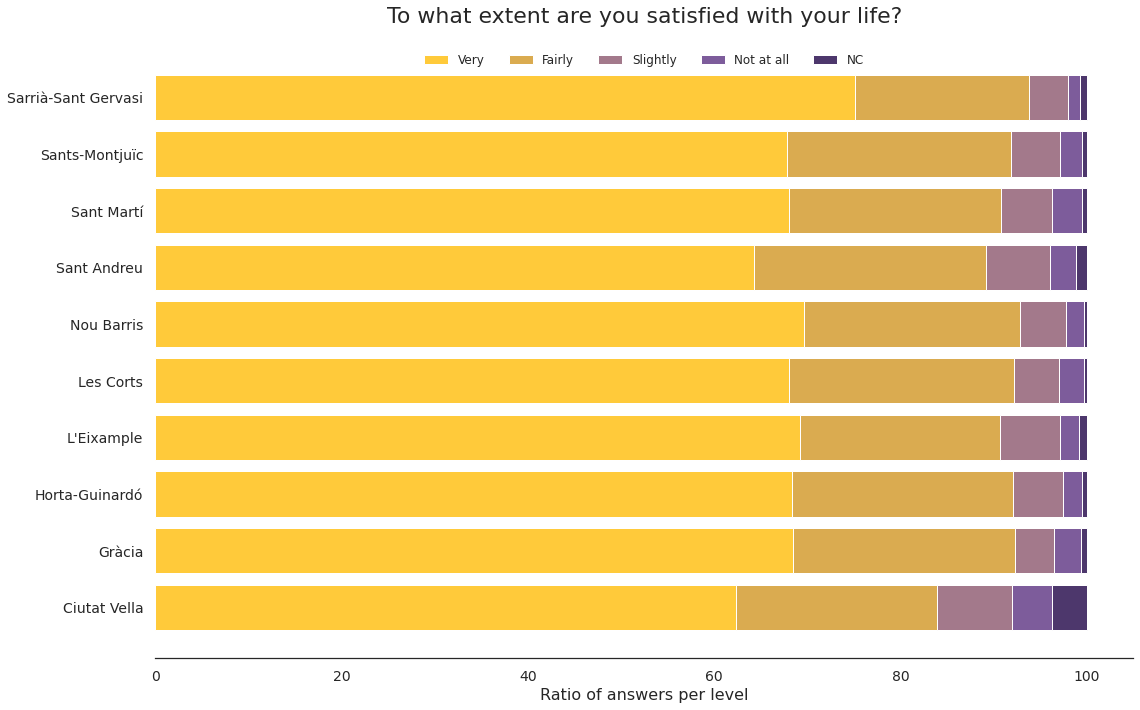

In [57]:
df_ = df_t.copy()
att_name = 'Nom_Districte_Educatiu'
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
s_bar_plot(m_,lev,att_, title=True)

_Sant Andreu_ and _Ciutat Vella_ are the two districts with the lowest ratio of kids "very" Satisfied with their life.  It is interesting to observe that they also were the two districts with the highest ratio of _boredom_. This might indicate a relation between life satisfaction and the boredom experienced. Furthermore, _Sarrià-Sant Gervasi_ is the district with the highest ratio of kids "very" satisfied, indicating the beforementioned connection with income. 

To investigate the relation with the income, we can evaluate the results for the neighbourhoods groups in the variable `'ERFDbllp'`. Even if these levels would represent different categories in each district, evaluating them can help clarify the relation with the income:

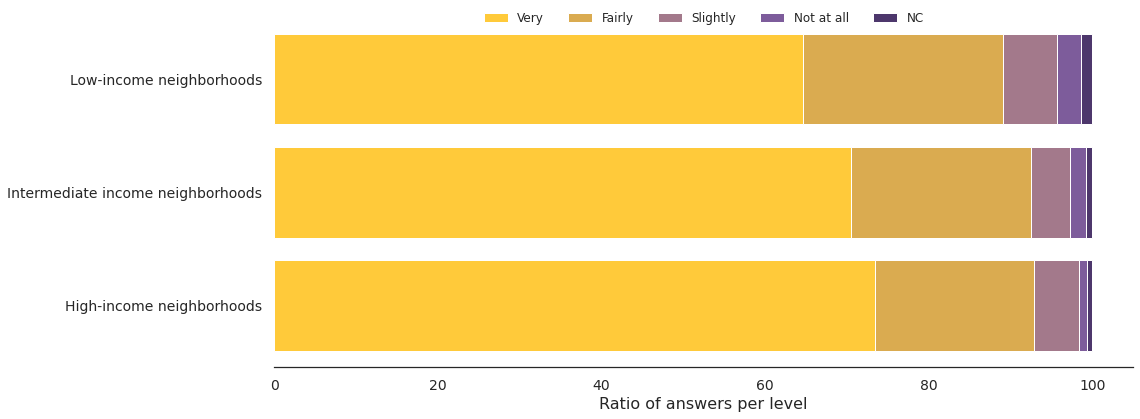

In [58]:
att_name = 'ERFDbllp'
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)

# Removing the neighbourhoods outside BCN
s_plot = s_bar_plot(m_[:3],lev,att_[:3], fig_tup=(16, 6))

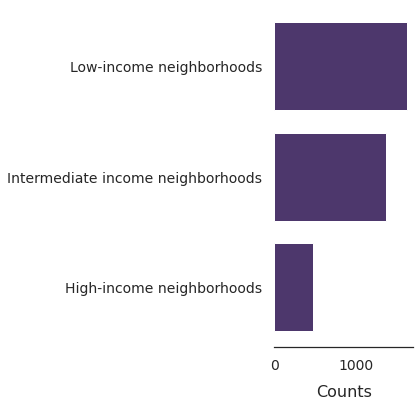

In [59]:
att_bar_plot(df_, att_name, att_[:3], fig_tup = (6,6))

By looking at the figure we can conclude, that is possible to observe a decrease of the "very statisfied ratio" with the decrease of income. However, it is important to keep in mind that the neighbourhoods with the highest income have a lower representation.

To finalize the assesment of the income it is possible to examine the results of the question "How often are you concerned about the money your family has?". 

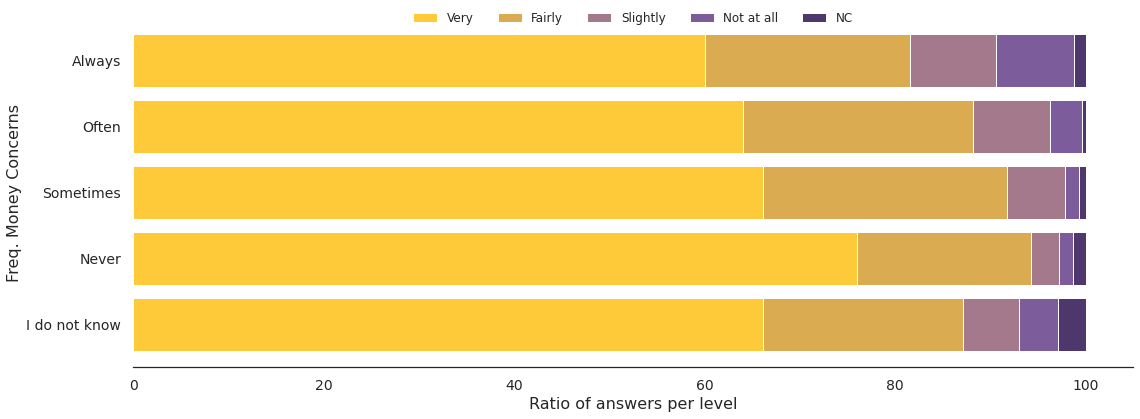

In [44]:
# How often are you concerned about the money your family has?
att_name = 'preocupacio_diners'
attr_label = 'Freq. Money Concerns'
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
# s_bar_plot(m_,lev,att_, fig_tup=(16, 6))

att_ = np.append(np.append(att_[0], att_[3:]), att_[1:3][::-1])
m_ = [m_[0]] + m_[3:] + m_[1:3][::-1]
s_bar_plot(m_[::-1],lev,att_[::-1],fig_tup=(16, 6), attr_label=attr_label)

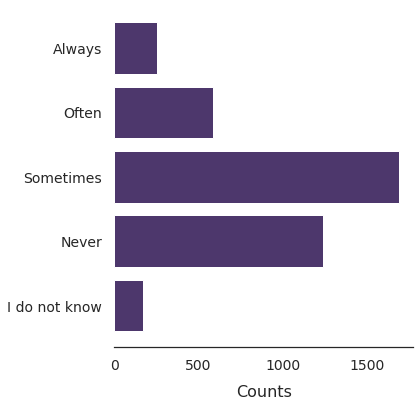

In [45]:
att_bar_plot(df_, att_name, att_[::-1], fig_tup = (6,6))

Here, the same pattern is observed: The kids with a higher concern regarding money show the lowest ratio on life satisfaction. Looking at the distribution of the answer counts, it is possible to notice a tendency to mark "Sometimes" and "Never" over other levels.

It is interesting to observe how other variables behave as well:

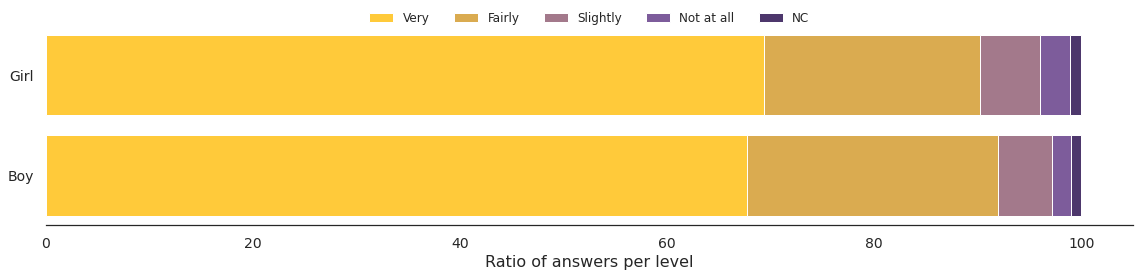

In [46]:
df_ = df_t.copy()
att_name = 'Sexe'
m,lev,att = sat_dataprep(df_, att_name) 
m_, att_ = m_att_resize(m,lev,att)
s_bar_plot(m_,lev,att_, fig_tup=(16, 4))

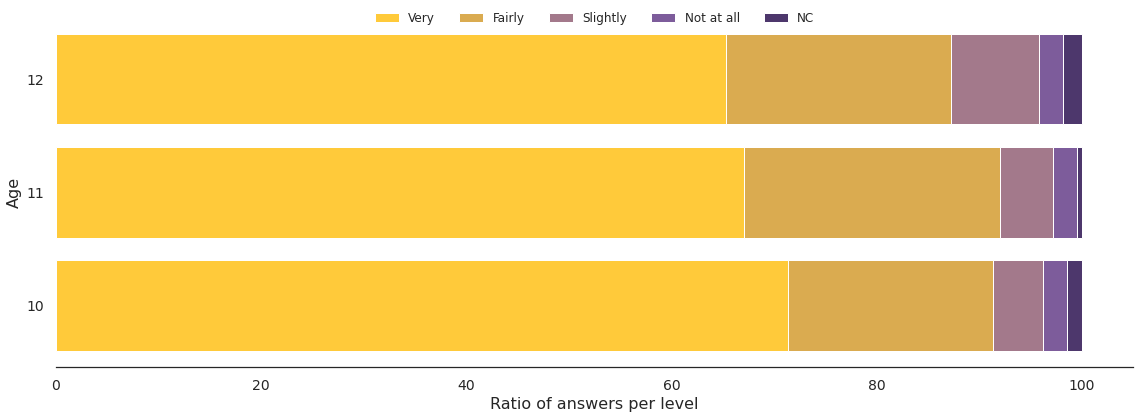

In [47]:
att_name = 'Edat'
m,lev,att = sat_dataprep(df_, att_name) 

m_, att_ = m_att_resize(m,lev,att)
s_bar_plot(m_,lev,att_, fig_tup=(16, 6), attr_label="Age")

The main point is that there is not a significant difference between genders. However, when looking at the age it is possible to see a slight decrease with growth. This could refer back to the before-mentioned "vital optimism-bias" and how, with the transition towards adolescence, the optimism starts to decrease.

It is interesting as well to asses additional attributes, such as if there is a difference for kids that have _learning difficulties_. In the survey the kids are asked to answer yes or no to the question: "Do you have a _learning difficulty_ such as: dyslexia, attention deficit disorder, hyperactivity or others?" 

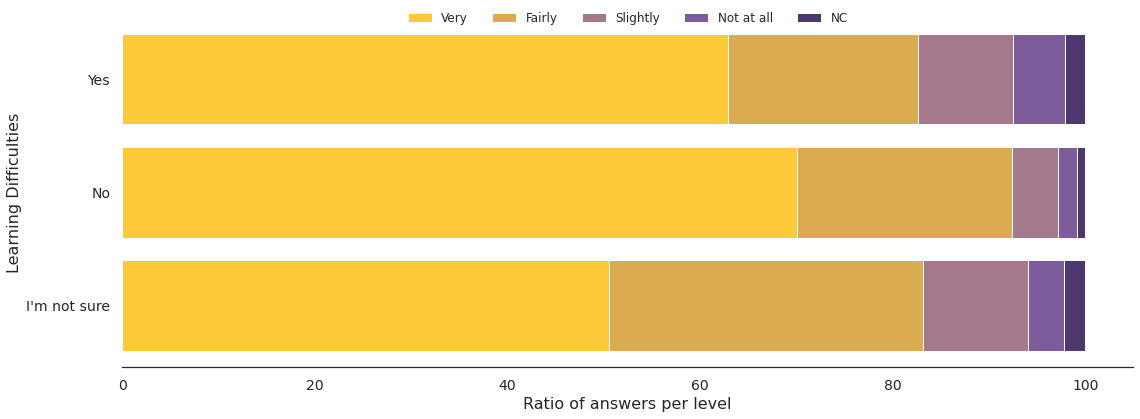

In [48]:
att_name = 'dificultat_aprenentatge'
attr_label="Learning Difficulties"
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
# s_bar_plot(m_,lev,att_, fig_tup=(16, 6))

att_ = np.append(att_[0], att_[2:])
m_ = [m_[0]]+m_[2:]
s_bar_plot(m_,lev,att_,fig_tup=(16, 6), attr_label=attr_label)

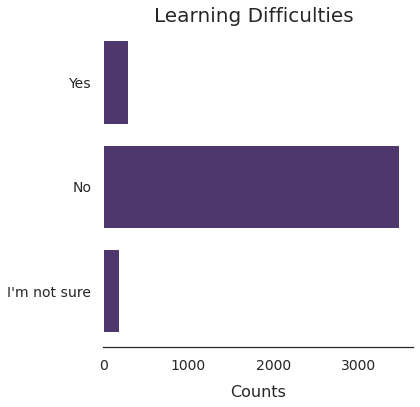

In [49]:
att_bar_plot(df_, att_name, att_[:3], fig_tup = (6,6), att_lab= attr_label)

It is possible to observe that the satisfaction level is lower for the kids that have _learning difficulties_, almost 20% of them marked as "Fairly" satisfied and 10% "Slightly". However is important to keep in mind, that the proportion of kids that answer "Yes" or "Not sure" is extremely lower than the ones that answered "No".

## 3.3.2. Clustering
So far several different attributes have been manually analyzed to see their impact of the life satisfaction of the questionaire participants. 
But we were curious to see if the data would have any underlying clustering, that wouldn't be possible for humans to see, but maybe a machine learning model would be able to catch.

To explore that option, a K-means clustering model were created. The data was split into two categories, using the `SLSSmc` column. Here, one category would represent participants who were _"very satisfied"_ and all other options would be categorized as _"other"_, in an effort to make the two clusters equal in size.

The data used in the model were a combination of all attributes investigated during the satisfaction analysis, including columns as `Sexe` (Sex), `Edat` (Age), `ERFDbllp` (Type of neighbourhood), etc. More data columns were also added in an effort to include as much information as possible in the analysis. Relevant columns were binarized or one-hot-encoded.

In [50]:
def prepare_data(standardize=True):
    # Cluster DataFrame
    c_df = df_t.copy()
    c_df = c_df[c_df != 'NC'].dropna().reset_index(drop=True)

    c_cols = [
        'SLSSmc',  # The true classification
        'Sexe', 'Edat',  # Sex and age
        'ERFDbllp',  # neighbourhood
        'dificultat_aprenentatge',  # Learning difficulities
        'dificultat_per_malaltia',  # Difficulties due to illness
        'preocupacio_diners',  # Freq. Money Concerns
        'b_seguretat',  # Do yo feel secure in your neighborhood?
        'f_felicitat', 'f_tristesa', 'f_calma', 'f_estres', 'f_energia', 'f_avorriment',  # Feelings
        'bm_internet', 'bm_mobil', 'bm_sabates', 'bm_mescola','bm_maficions',  # Access to material
        ]

    c_df = c_df[c_cols]

    c_df['Edat'] = c_df[c_df['Edat'].isin(['10', '11', '12'])]['Edat']
    c_df['ERFDbllp'] = c_df[c_df['ERFDbllp'].isin(['Low-income neighborhoods', 'Intermediate income neighborhoods', 'High-income neighborhoods'])]['ERFDbllp']
    
    ## There is going to be two groups: Very satisfied and other (better name pending)
    groups = {}
    for i, cat in enumerate(c_df['SLSSmc'].value_counts().index):
        if i == 0:
            groups[cat] = 'Very satisfied'
        else:
            groups[cat] = 'Other'

    c_df['SLSSmc'] = c_df['SLSSmc'].map(groups)

    binary_d = defaultdict(LabelEncoder)
    
    one_hot_col = ['Edat', 'ERFDbllp', 'dificultat_aprenentatge', 'dificultat_per_malaltia', 'preocupacio_diners', 'b_seguretat']
    binary_col = ['SLSSmc', 'Sexe', 'bm_internet', 'bm_mobil', 'bm_sabates', 'bm_mescola','bm_maficions']
    num_cols = ['f_felicitat', 'f_tristesa', 'f_calma', 'f_estres', 'f_energia', 'f_avorriment']

    c_df[num_cols] = c_df[num_cols].astype('float')  # Make sure all numbers are floats and not objects

    for col in one_hot_col:
        one_hot = pd.get_dummies(c_df[col])  # Get one hot encoding of columns B
        one_hot.columns = [f'{col}_{oh_col}' for oh_col in one_hot.columns]  # 
        c_df = c_df.drop(col, axis=1)  # Drop column as it is now encoded
        c_df = c_df.join(one_hot)  # Join the encoded df

    # Encoding the variable
    binary_fit = c_df[binary_col].apply(lambda x: binary_d[x.name].fit_transform(x)).reset_index(drop=True)
    c_df[binary_col] = binary_fit

    if standardize:
        c_df[num_cols] = pd.DataFrame(StandardScaler().fit_transform(c_df[num_cols]), columns=num_cols).reset_index(drop=True)
    else:
        c_df[num_cols] = c_df[num_cols].reset_index(drop=True)

    return c_df, binary_d

In [51]:
trans_df, _ = prepare_data(False)  # Get the transformed DataFrame

X = trans_df.iloc[:, 1:].values
y = trans_df.iloc[:, 0].values  # SlSSmc

kmeans = KMeans(n_clusters=2, random_state=42)  # Initiate the model 
clusters = kmeans.fit_predict(X)  # Create the clustering

# Because k-means knows nothing about the identity of the cluster, the labels may be permuted
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

# Compute the accuracy
print(f'The accuracy of the clusters are: {accuracy_score(y, labels)*100 :.3f}%')

The accuracy of the clusters are: 69.720%


It's seen that the model accurately clusters the data with an accuracy of $\sim 69.7\%$. Looking at this number alone, makes it look like some kind of clustering is apperent, but it is misleading. The two categories created, has the following number of observations:

$$
\text{Very satisfied} = 2466,\ \text{other} = 1071.
$$

With a quick calculation you get the follwing result:

$$ 
\frac{2466}{2466+1071} = 0.6972010178117048 
$$

So the accuracy achieved could in reality be the result of clustering all data points as a single cluster or, if two clusters are present, both clusters consists of a majority of the _"very satisfied"_ category.
To see if this can be visualized, a PCA is performed on the data.

The explained variance of the principal components, are: [0.38610819 0.16089171]


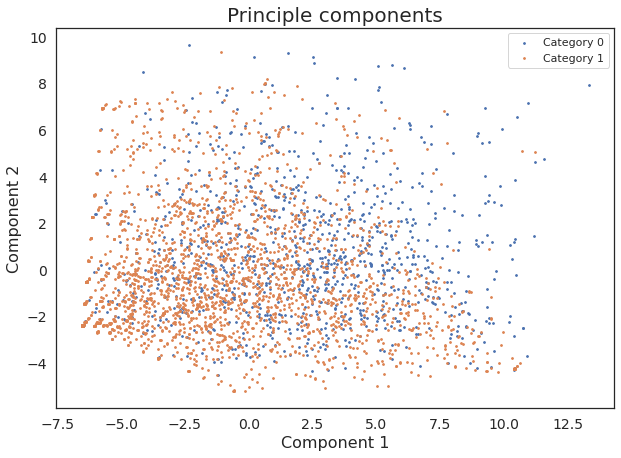

In [52]:
pca = PCA(n_components=2)
pca.fit(X)
pc_variance = pca.explained_variance_ratio_
print('The explained variance of the principal components, are:', pc_variance)

X_pca = pca.transform(X)

plt.figure(figsize=(10, 7))
for t in np.unique(y):
    mask = (y == t)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Category {t}', s=3)

plt.title('Principle components', size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Component 1', size=16)
plt.ylabel('Component 2', size=16)
plt.legend()
plt.show()

Plotting the data using principle component 1 and 2 we see that no clustering or correlation is visible. The two categories are mixed between each other and while there is some concentration of points in the bottom left corner of the plot, most points are scattered following no pattern. 

The lack of clustering and the bad seperation in the PC space might be a result of the data format. Most columns of the data is binary, while the remaining columns consist of discrete values. This might lead to a lack of correlation between columns. 

# 4. Visualization

In the website, several visualizations have been used to allow the user to interpret and understand the information presented to them. 
The visualizations used, are the following: 

- **Choropleth map** - As the data used in this data analysis is about the districts in Barcalona, a choropleth map allows us to show the user information that is specific for each region, while still retaining the ability to compare their values. The map is also interactive, which allows the user to be curious and look into the data itself.
- **Heatmap** - The heat map is represented using squares, where each square belongs to a district and a feature. Here it is possible to get an overview over several features at once, while easily allowing comparison between districts. Furthermore, the colors allows for quick comparison by skimming over the figure, while the actual values allows for in-depth comparison.
- **Vertical overlayed bar charts** - The vertical overlayed bar plot, are two bar charts in the same plot, where the bars are set to be a bit transparent. The bars allows the tendency of the data to be shown, while comparing the two opposite moods. This help to illustrate the point with positive emotions have a small tail and tall peak, while negative emotions have a more broad tail. Furthermore, filtering is possible through the legends and a dropdown (for choosing between districts) is including, to allow the user to explore the data.
- **Radar plot/Spider plot** - The radar plot allows to compare several attributes for different components. In this case, the plot is used compare feelings between the districts. Furthermore, checkboxes are implemented to allow the user filter what districts they want to see. This allows the user to compare the districts individually against each other or choose more (or all) to see how they compare. 
- **Stacked horizontal bar charts** - The stacked horizontal bar charts, are bar charts which is seperated into several categories to compare the values directly. This is used to show life satisfaction for several attributes of the data, which the user can select by using the radio items. Furthermore, the values of the bars are highlighted when hovering over a specific part of the chart. This allows the user to get a quick overview of the data and it's proportions by a quick glance, while allowing them to get more specific information through interactivity.


# 5. Genre

The website uses a Magazine Style format to guide the user through the findings of the data set, while showing figures to support the different claims that are made.
The website uses several of the Visual narrative and narrative structure tools from [Edward Segel and Jeffrey Heer. Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf).

Of the Visual narrative tools, only the feature distinction tool (Highlightning) is used. This tool is used to let us show specific findings that are relevant to the viewer. Other tools in the Visual narrative aren't used, as their focus lie on the use of images/video. Our website doesn't include such things, as the figure presented are purely data-centric.

Of the Narattive structure several tools are being used. The ordering of the website is linear (_Ordering_), where the user is introduced to the subject, while guiding them through the different facts and discoveries that are made. It is possible to read some sections as standalone, but the user won't get the full experience of the story. The user is also presented with the possibility of interacting with several figures throughout the website. Here, the user has the possibility to use Hover highlighting (_Interactivity_) to highlight values for specific regions on a map or to get the exact values from bar charts, to get a deeper understanding of the data presented. Furthermore, some figures gives the user the option to use filtering (_Interactivity_). This allows the user to look into more specific attributes (such as districts) or allow the user to visualize differences between attributes.
The website uses several of the _Messaging_ tools to tell the story and purpose to the user. The user is first exposed to a introductory text (_Messaging_) that explains the purpose of the analysis. Every section is indicated using a Headline (_Messaging_), which allows the user to see what the analysis is going to deal with. And in the end of the story, a summary (_Messaging_), about the results of the data analysis, is shown to recap the information that has been presented.


# 6. Discussion

This report was divided into three sections that aimed to unravel the effects that the demographic characteristics of a district may have on the children of Barcelona. 

The first step aimed to understand how the children perceive these characteristics over their own neighbourhood. Initially, their perception of security was studied, and it was possible to understand in which neighbourhoods the children felt less secure. However, it was interesting to compare it with their perception over a more positive element, being the availability of playgrounds.  Certain similarities were identified. The neighbourhoods with lower income being the ones perceived as less secure and with fewer playgrounds. However, this behaviour was not maintained in all instances. It was as well interesting to analyse the differences between districts on the accessibility to materials and their family typologies.

Having learned a bit more about the districts, it was interesting to evaluate the feelings of children. The vital optimism bias was appreciated since over 50% of kids responded that they felt  _always_ Happy and Energetic over the past two weeks. However, when looking at the differences between districts it was not directly clear how the behaviours changed. By performing a radar plot it was possible to aggregate all information together and identify that there were indeed differences when it came to negative feelings. Different ratios were identified for _Boredom_ and _Stress_ over the districts, but it was difficult to identify a clear pattern. 

Lastly, in order to define one measure that could be compared against different attributes, "life satisfaction" was evaluated. It was possible to detect clearer distinctions on satisfaction levels when evaluating different income-related attributes. However, other variables were as well contributing, as it was possible to see with kids having learning difficulties or even their age.  These effects made us wonder if a machine learning algorithm could help us identify how the different variables, we had available, contributed to the children satisfaction.  A K-Means clustering was performed but the results obtained were not completely satisfying. Nevertheless, our feeling is that other algorithms might be able to provide better results. Thus our next steps would be to perform more trials and continue our investigation towards, which characteristics contribute to the kids' life satisfaction. When we can answer the question, we would be able to identify which corrective actions could boost children's welfare. 


# 7. Collaborations

All team members have contributed equally to the project and know and understand every aspect of the project.
However, according to the description of the project a person needs to be responsible for every aspect of the project.
The table below is thus constructed.  



| Task                                    	| Main responsible 	|
|-----------------------------------------	|:----------------:	|
| Data Analysis                       	    |      Silvia      	|
| About the Districts      	                |      Pietro/Silvia      	|
| About the Feelings  	                    |      Silvia 	    |
| About Life Satisfaction - Analysis       	|      Silvia     	|
| About Life Satisfaction - Clusters        |      Stefan     	|
| Webpage content                	        |  Stefan/ Silvia   |
| Setup and design of webpage             	|      Pietro      	|
| Dynamic graphics             	            |      Pietro      	|
| Visualization NB content                  |        Stefan     	|
| Genre NB content                          |        Stefan     	|


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cb1a2c0-2f56-40d6-8008-fedeaf8b6a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>